In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from scipy.stats import pearsonr

In [4]:
covid = pd.read_csv("normalised_covid_deaths_cases.csv")
covid.sort_values(by='date',inplace=True)


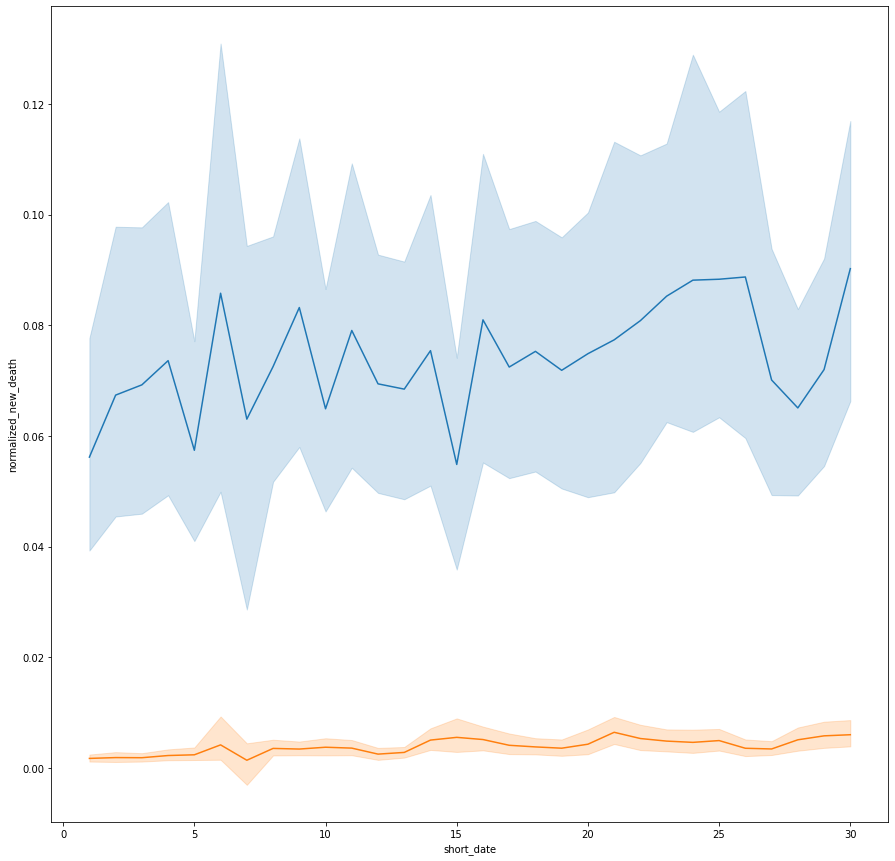

In [9]:
plt.figure(figsize=(15,15))

sns.lineplot(x=covid['short_date'],y=covid['normalized_new_case'])
sns.lineplot(x=covid['short_date'],y=covid['normalized_new_death'])

In [10]:
paths_list=[]
for i in range(1,31): # day 1 to 30 for the month of April
    if i>9:
        paths_list.append('../nlp/average_sentiment_{}.csv'.format(i))
    else:
        paths_list.append('../nlp/average_sentiment_0{}.csv'.format(i))

print(paths_list)

['../nlp/average_sentiment_01.csv', '../nlp/average_sentiment_02.csv', '../nlp/average_sentiment_03.csv', '../nlp/average_sentiment_04.csv', '../nlp/average_sentiment_05.csv', '../nlp/average_sentiment_06.csv', '../nlp/average_sentiment_07.csv', '../nlp/average_sentiment_08.csv', '../nlp/average_sentiment_09.csv', '../nlp/average_sentiment_10.csv', '../nlp/average_sentiment_11.csv', '../nlp/average_sentiment_12.csv', '../nlp/average_sentiment_13.csv', '../nlp/average_sentiment_14.csv', '../nlp/average_sentiment_15.csv', '../nlp/average_sentiment_16.csv', '../nlp/average_sentiment_17.csv', '../nlp/average_sentiment_18.csv', '../nlp/average_sentiment_19.csv', '../nlp/average_sentiment_20.csv', '../nlp/average_sentiment_21.csv', '../nlp/average_sentiment_22.csv', '../nlp/average_sentiment_23.csv', '../nlp/average_sentiment_24.csv', '../nlp/average_sentiment_25.csv', '../nlp/average_sentiment_26.csv', '../nlp/average_sentiment_27.csv', '../nlp/average_sentiment_28.csv', '../nlp/average_sen

In [43]:
nationwide_sentiment = []
april_average_sentiment = pd.DataFrame()
for path in paths_list:
    df = pd.read_csv(path)
    nationwide_sentiment.append(df['sentiment'].mean())

print(nationwide_sentiment)

[-0.1667896659974472, -0.15996205105366837, -0.14739869497678584, -0.15435843701052002, -0.15753315160621292, -0.15694291420494952, -0.1476013521146406, -0.14517005178226886, -0.14759146730558015, -0.1353241571743883, -0.14880999810428322, -0.15153064919622597, -0.15278686994229906, -0.15336251486976585, -0.16859515389619315, -0.15674130723239307, -0.1616913730132844, -0.15641659147789957, -0.16736120722343734, -0.16673093970686628, -0.1583259332956597, -0.168324615611352, -0.16673093970686628, -0.15190989746069203, -0.16338323829537504, -0.17429567667995244, -0.15588063033553098, -0.17214550096865847, -0.1731214484713908, -0.15526127890942865]


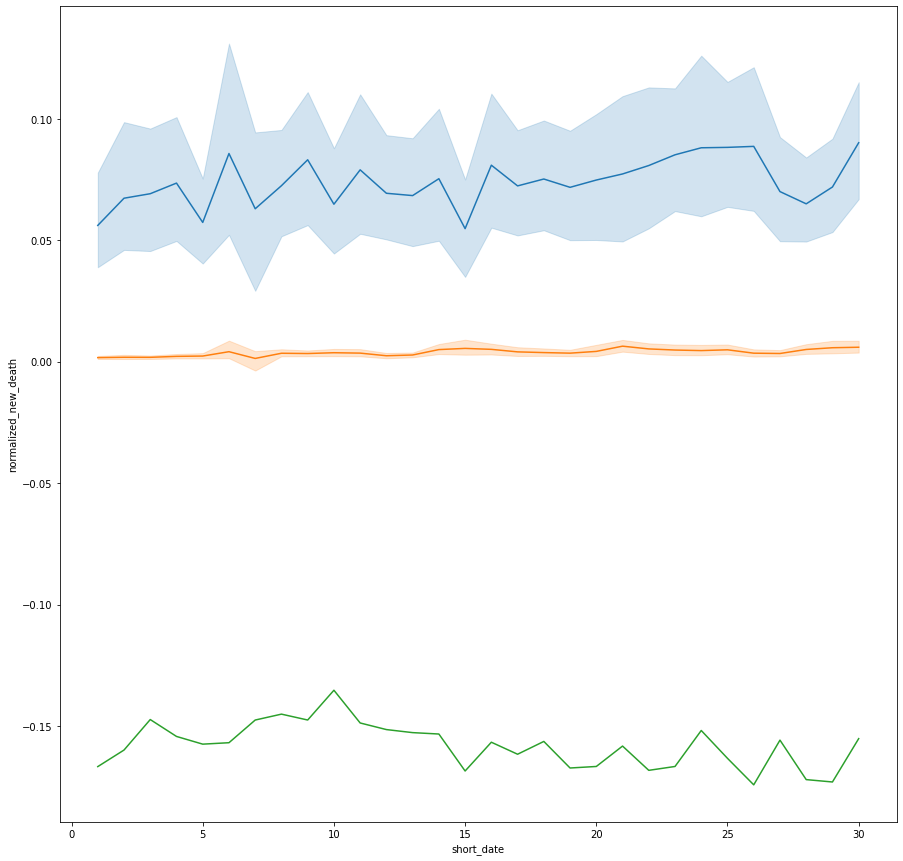

In [15]:
plt.figure(figsize=(15,15))

sns.lineplot(x=covid['short_date'],y=covid['normalized_new_case'])
sns.lineplot(x=covid['short_date'],y=covid['normalized_new_death'])

sns.lineplot(x=[i for i in range(1,31)],y=nationwide_sentiment)


In [26]:
nationwide_daily_new_cases = covid.groupby(['short_date'])['normalized_new_case'].sum()
nationwide_daily_new_deaths = covid.groupby(['short_date'])['normalized_new_death'].sum()



In [29]:
#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
# calculate Pearson's correlation
corr, _ = pearsonr(nationwide_daily_new_cases, nationwide_sentiment)
print('Pearsons correlation between normalized new covid cases and average twitter sentiment nationwide: %.3f' % corr)

Pearsons correlation between normalized new covid cases and average twitter sentiment nationwide: -0.039


In [30]:
corr, _ = pearsonr(nationwide_daily_new_deaths, nationwide_sentiment)
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment nationwide: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment nationwide: -0.360


Negative correlation means that an increase in cases is correlated to a decrease in sentiment (thus more negative)

No handles with labels found to put in legend.


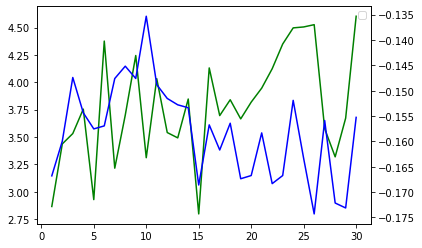

In [34]:
#https://stackoverflow.com/questions/47591650/second-y-axis-time-series-seaborn
sns.lineplot(data= nationwide_daily_new_cases, color="g")
ax2 = plt.twinx()
sns.lineplot(y= nationwide_sentiment, x = [i for i in range(1,31)], color="b", ax=ax2)

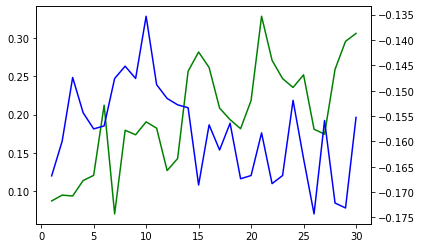

In [35]:
sns.lineplot(data= nationwide_daily_new_deaths, color="g")
ax2 = plt.twinx()
sns.lineplot(y= nationwide_sentiment, x = [i for i in range(1,31)], color="b", ax=ax2)

In [58]:
april_average_sentiment = pd.read_csv(paths_list[0])
april_average_sentiment['date'] = 1

for i in range(1,30):
    df = pd.read_csv(paths_list[i])
    df['date'] = i
    april_average_sentiment = april_average_sentiment.append(df, ignore_index=True)

april_average_sentiment.drop(columns='Unnamed: 0', inplace=True)

april_average_sentiment.info()
april_average_sentiment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
sentiment    1500 non-null float64
magnitude    1500 non-null float64
state        1500 non-null object
date         1500 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 47.0+ KB


,sentiment,magnitude,state,date
0,-0.164179,0.700000,AK,1
1,-0.155914,0.640246,AL,1
2,-0.179669,0.676359,AR,1
3,-0.170283,0.675881,AZ,1
4,-0.167857,0.680188,CA,1
...,...,...,...,...
1495,-0.142558,0.710310,VA,29
1496,-0.182609,0.866667,VT,29
1497,-0.105985,0.663175,WA,29
1498,-0.155979,0.735009,WI,29


In [60]:
april_average_sentiment.to_csv("april_average_sentiment.csv", index= False)

_________________________________________________________________________


In [69]:
wyoming_daily_new_cases = covid[covid['State']=='Wyoming'][['normalized_new_case','short_date']]
wyoming_daily_new_deaths = covid[covid['State']=='Wyoming'][['normalized_new_death','short_date']]
wyoming_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='WY']

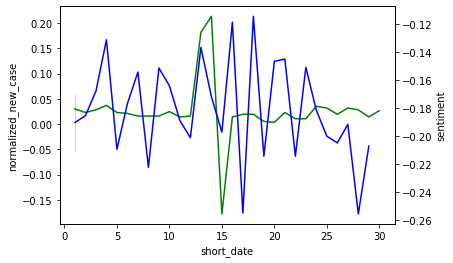

In [70]:
sns.lineplot(y=wyoming_daily_new_cases['normalized_new_case'], x=wyoming_daily_new_cases['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= wyoming_daily_sentiment['sentiment'], x = wyoming_daily_sentiment['date'], color="b", ax=ax2)

In [71]:
corr, _ = pearsonr(wyoming_daily_sentiment['sentiment'], wyoming_daily_new_cases['normalized_new_case'])
print('Pearsons correlation between normalized new covid cases and average twitter sentiment in WY: %.3f' % corr)

Pearsons correlation between normalized new covid cases and average twitter sentiment in WY: 0.061


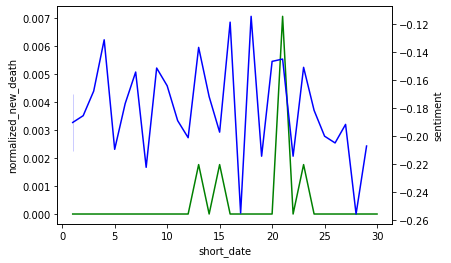

In [72]:
sns.lineplot(y=wyoming_daily_new_deaths['normalized_new_death'], x=wyoming_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= wyoming_daily_sentiment['sentiment'], x = wyoming_daily_sentiment['date'], color="b", ax=ax2)

In [73]:
corr, _ = pearsonr(wyoming_daily_sentiment['sentiment'], wyoming_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in WY: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in WY: 0.118


In [75]:
dc_daily_new_cases = covid[covid['State']=='South Dakota'][['normalized_new_case','short_date']]
dc_daily_new_deaths = covid[covid['State']=='South Dakota'][['normalized_new_death','short_date']]
dc_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='DC']

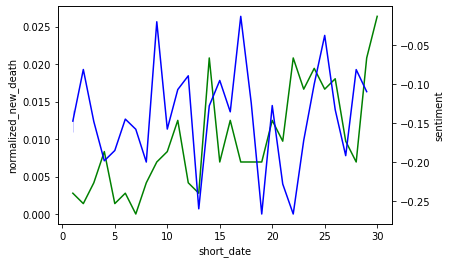

In [76]:
sns.lineplot(y=dc_daily_new_deaths['normalized_new_death'], x=dc_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= dc_daily_sentiment['sentiment'], x = dc_daily_sentiment['date'], color="b", ax=ax2)

In [77]:
corr, _ = pearsonr(dc_daily_sentiment['sentiment'], dc_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in DC: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in DC: -0.118


In [78]:
sd_daily_new_cases = covid[covid['State']=='South Dakota'][['normalized_new_case','short_date']]
sd_daily_new_deaths = covid[covid['State']=='South Dakota'][['normalized_new_death','short_date']]
sd_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='SD']

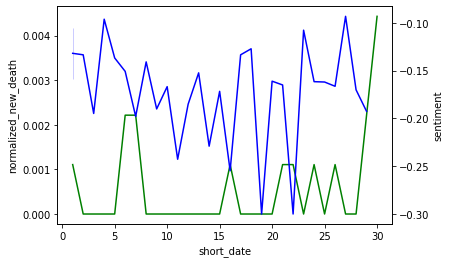

In [79]:
sns.lineplot(y=sd_daily_new_deaths['normalized_new_death'], x=sd_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= sd_daily_sentiment['sentiment'], x = sd_daily_sentiment['date'], color="b", ax=ax2)

In [80]:
corr, _ = pearsonr(sd_daily_sentiment['sentiment'], sd_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in SD: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in SD: 0.094


In [81]:
nj_daily_new_cases = covid[covid['State']=='New Jersey'][['normalized_new_case','short_date']]
nj_daily_new_deaths = covid[covid['State']=='New Jersey'][['normalized_new_death','short_date']]
nj_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='NJ']

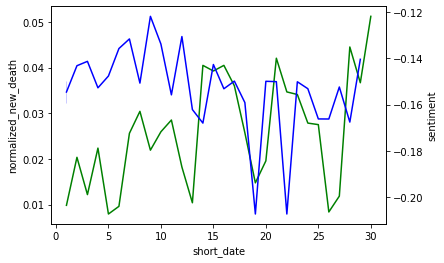

In [82]:
sns.lineplot(y=nj_daily_new_deaths['normalized_new_death'], x=nj_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= nj_daily_sentiment['sentiment'], x = nj_daily_sentiment['date'], color="b", ax=ax2)

In [83]:
corr, _ = pearsonr(nj_daily_sentiment['sentiment'], nj_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in NJ: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in NJ: -0.004


In [84]:
ny_daily_new_cases = covid[covid['State']=='New York'][['normalized_new_case','short_date']]
ny_daily_new_deaths = covid[covid['State']=='New York'][['normalized_new_death','short_date']]
ny_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='NY']

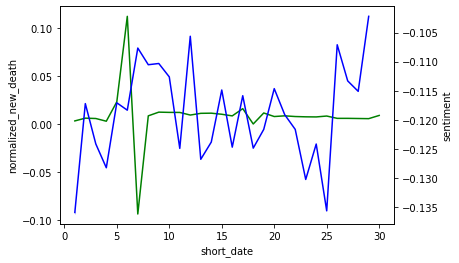

In [85]:
sns.lineplot(y=ny_daily_new_deaths['normalized_new_death'], x=ny_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= ny_daily_sentiment['sentiment'], x = ny_daily_sentiment['date'], color="b", ax=ax2)

In [86]:
corr, _ = pearsonr(ny_daily_sentiment['sentiment'], ny_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in NY: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in NY: 0.023


In [90]:
al_daily_new_cases = covid[covid['State']=='Alabama'][['normalized_new_case','short_date']]
al_daily_new_deaths = covid[covid['State']=='Alabama'][['normalized_new_death','short_date']]
al_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='AL']

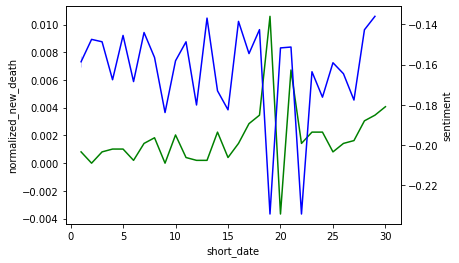

In [91]:
sns.lineplot(y=al_daily_new_deaths['normalized_new_death'], x=al_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= al_daily_sentiment['sentiment'], x = al_daily_sentiment['date'], color="b", ax=ax2)

In [92]:
corr, _ = pearsonr(al_daily_sentiment['sentiment'], al_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in AL: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in AL: 0.404


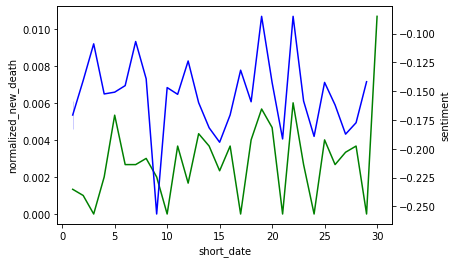

In [94]:
ms_daily_new_cases = covid[covid['State']=='Mississippi'][['normalized_new_case','short_date']]
ms_daily_new_deaths = covid[covid['State']=='Mississippi'][['normalized_new_death','short_date']]
ms_daily_sentiment = april_average_sentiment[april_average_sentiment['state']=='MS']

sns.lineplot(y=ms_daily_new_deaths['normalized_new_death'], x=ms_daily_new_deaths['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= ms_daily_sentiment['sentiment'], x = ms_daily_sentiment['date'], color="b", ax=ax2)

In [95]:
corr, _ = pearsonr(ms_daily_sentiment['sentiment'], ms_daily_new_deaths['normalized_new_death'])
print('Pearsons correlation between normalized new covid deaths and average twitter sentiment in MS: %.3f' % corr)

Pearsons correlation between normalized new covid deaths and average twitter sentiment in MS: 0.182


In [96]:
_______________________________________________________________________________________________________

NameError: name '_______________________________________________________________________________________________________' is not defined

In [108]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    #'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    #'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    #'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    #'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    #'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    #'West Virginia': 'WV', ????
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
print(us_state_abbrev)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [109]:
correlations = {}
for state, abbrev in us_state_abbrev.items():
    #plt.close('all')
    daily_new_cases = covid[covid['State']==state][['normalized_new_case','short_date']]
    daily_new_deaths = covid[covid['State']==state][['normalized_new_death','short_date']]
    daily_sentiment = april_average_sentiment[april_average_sentiment['state']==abbrev]

    #sns.lineplot(y=daily_new_deaths['normalized_new_death'], x=daily_new_deaths['short_date'] , color="g")
    #ax2 = plt.twinx()
    #sns.lineplot(y= daily_sentiment['sentiment'], x = daily_sentiment['date'], color="b", ax=ax2)
    #plt.savefig("./lines/{}".format(abbrev))
    print(abbrev)
    corr, _ = pearsonr(daily_sentiment['sentiment'], daily_new_deaths['normalized_new_death'])
    correlations[abbrev] = corr


AL
AK
AZ
AR
CA
CO
CT
DE
DC
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WI
WY


In [112]:
for i,v in correlations.items():
    print(i,v)

AL 0.4042481242016618
AK -0.11121337488720312
AZ -0.09055759924336383
AR 0.10331991662634712
CA 0.0387976409514421
CO 0.09252596006420559
CT -0.29468397710852257
DE -0.09806096599573698
DC -0.11790701579385249
FL -0.10209454313024313
GA -0.05880369183811396
HI 0.30435667162952496
ID 0.15122732743848727
IL 0.07351560936098646
IN -0.24182028135419253
IA 0.11608478965391839
KS 0.4887030669761749
KY -0.025689855955333643
LA -0.13610741307106486
ME 0.1457615439438547
MD 0.1790703008992431
MA -0.3133439194910171
MI 0.09638144794990841
MN -0.46345176733391036
MS 0.18212048717794074
MO 0.0071399210388100876
MT 0.11657315498640171
NE -0.11201309710467988
NV -0.1493818571144836
NH -0.11377017349001993
NJ -0.0035763607619375554
NM 0.09404852218049364
NY 0.02342729813135663
NC -0.1880829536838333
ND -0.1490838341559282
OH -0.42473780703012376
OK 0.013253343390298267
OR 0.1418951246918782
PA 0.03634694163829644
RI -0.038135298552669075
SC -0.20048640751220445
SD 0.09420123738159064
TN 0.23045824318